# Modelo de Ising

Este es el modelo más sencillo del magnetismo. El Hamiltoniano que describe al modelo de Ising consta únicamente del término de intercambio

$$\mathcal{H} = -J\sum_{i, j} S_iS_j$$

donde $J$ es la constante de intercambio y $S_i$ y $S_j$ son los espines en la posición $i$ y $j$, respectivamente. Dichos espines pueden tomar únicamente dos posibles configuraciones: $\uparrow$ o $\downarrow$.

# Importar librerías
- **numpy**: librería de análisis numérico
- **pyplot**: librería de graficación

In [ ]:
import numpy
from matplotlib import pyplot

# Definición de parámetros

- Tamaño del sistema L x L
- Constante de intercambio
- Constante de Boltzmann

In [ ]:
L = 10
J = 1.0
kb = 1.0

Creación del estado del sistema, donde cada sitio es un $\pm$ 1

In [ ]:
sites = numpy.random.choice([-1, 1], size=(L, L))

In [ ]:
sites

array([[-1,  1, -1,  1,  1,  1,  1,  1, -1, -1],
       [ 1,  1, -1,  1,  1, -1,  1, -1,  1, -1],
       [-1, -1,  1, -1,  1, -1,  1,  1, -1, -1],
       [-1,  1,  1,  1, -1, -1, -1, -1,  1,  1],
       [-1, -1,  1,  1, -1, -1,  1,  1,  1, -1],
       [-1,  1, -1,  1,  1, -1, -1,  1, -1,  1],
       [-1,  1, -1, -1, -1,  1, -1,  1,  1, -1],
       [ 1, -1,  1, -1, -1,  1,  1,  1, -1, -1],
       [-1,  1, -1, -1, -1,  1,  1,  1,  1,  1],
       [ 1, -1, -1,  1, -1, -1,  1,  1,  1, -1]])

# Definición de funciones

- `plot_state()`: grafica el estado
- `magnetization()`: calcula la magnetización del estado
- `local_energy(x, y)`: calcula la energía de un solo sitio (x, y)
- `total_energy()`: calcula la energía de todo el estado
- `metropolis(x, y, T)`: realiza el algoritmo de Metrópolis en un sitio (x, y) dada una temperatura T
- `monte_carlo_step(T)`: realiza el algoritmo de Metrópolis L x L veces, escogiendo un sitio aleatorio cada vez

In [ ]:
def plot_state():
    colors = {1: "red", -1: "blue"}
    pyplot.figure()

    for x in range(L):
        for y in range(L):
            site = sites[x, y]
            pyplot.quiver(x, y, 0, site, color=colors[site], pivot="middle")

    pyplot.gca().set_aspect("equal")
    pyplot.show()

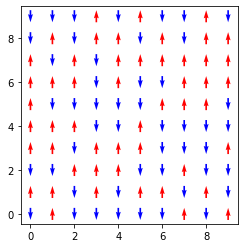

In [ ]:
plot_state()

## Magnetización

La magnetización es simplemente la suma de los espines

$$M = \sum_i S_i$$

In [ ]:
def magnetization():
    return numpy.sum(sites)

In [ ]:
magnetization()

2

## Para calcular la energía local

Se recorren los cuatro vecinos del sitio:
- Arriba (0, 1)
- Abajo (0, -1)
- Derecha (1, 0)
- Izquierda (-1, 0)

El operador módulo (%) se asegura de imponer **condiciones de frontera periódicas.**

In [ ]:
def local_energy(x, y):
    energy = 0.0
    for i, j in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
        # sites[x, y] -----> Si
        # Arriba ------> x + 0, y + 1
        # Abajo ------> x + 0, y - 1
        # Izquierda ------> x - 1, y + 0
        # Derecha ------> x + 1, y + 0

        # Vecinos ----------> sites[x + i, y + j] -------> Sj
        energy += sites[x, y] * sites[(x + i) % L, (y + j) % L]

    return -J * energy

In [ ]:
local_energy(3, L-1)

2.0

##Energía total
Calcular la energía local en cada sitio

In [ ]:
def total_energy():
  energy = 0.0
  for x in range(L):
    for y in range(L):
      energy += local_energy(x, y)

  return 0.5 * energy

In [ ]:
total_energy()

16.0

## Algoritmo de Metrópolis

- Escoger aleatoriamente un espín $S_i$

- Calcular la energía local $E_i$

- Generar un nuevo espín $S^{\prime}_i$

- Calcular la nueva energía local $E^{\prime}_i$

- Calcular el cambio de energía $\Delta E_i = E^{\prime}_i - E_i$

- Si $\Delta E_i \le 0$, se **acepta** el nuevo espín

- De lo contrario:
    - Se genera un número aleatorio, $r$, entre 0 y 1

    - Si $r \le \exp\left(-\frac{\Delta E_i}{k_BT}\right)$, se **acepta** el nuevo espín

    - De lo contrario, se **rechaza** el nuevo espín

In [ ]:
def metropolis(x, y, T):
  # Calcular energía local
  E_old = local_energy(x, y)

  # Generar nuevo espín
  sites[x, y] *= -1

  # Calcular la nueva energía local
  E_new = local_energy(x, y)

  # Calcular el cambio de energía
  delta_E = E_new -  E_old

  if delta_E <= 0:
    pass  # No hacer nada (aceptar el cambio)
  else:
    r = numpy.random.uniform()  # Número aleatorio entre 0 y 1
    if r <= numpy.exp(-delta_E / (kb * T)):
      pass  # No hace nada (aceptar el cambio)
    else:
      sites[x, y] *= -1

## Paso de Monte Carlo

_**Un paso de Monte Carlo (MCS) se define como realizar N veces el Algoritmo de Metrópolis, donde N es el número total de espines.**_

In [ ]:
def monte_carlo_step(T):
  N = L * L
  for i in range(N):
    x, y = numpy.random.randint(0, L, size=2)
    metropolis(x, y, T)

# Simulación a temperatura constante

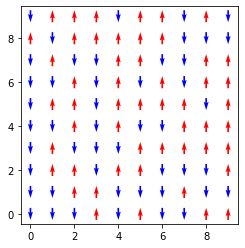

In [ ]:
sites = numpy.random.choice([-1, 1], size=(L, L))
plot_state()

In [ ]:
sites = numpy.random.choice([-1, 1], size=(L, L))
T = 0.1 # Temperatura
MCS = 1000 # Pasos de Monte Carlo (MCS). Análogo del tiempo, pero NO es tiempo.

for step in range(MCS):
  monte_carlo_step(T)

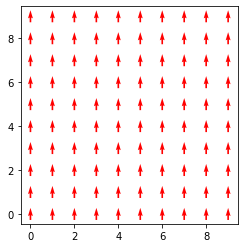

In [ ]:
plot_state()

# Ciclo de temperatura

# Graficación
## Cálculo de promedios